# Multivariate Credit Risk Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None

# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df = pd.read_csv("C:/Users/Diego/Documents/Data_Analytics/Python/Credit_Risk_Management/credit_risk_dataset.csv")

In [5]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [7]:
# Output the duplicates
df[df.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [8]:
# Remove duplicates (boolean indexing)
df = df[~df.duplicated()]

In [9]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [10]:
# Check for outliers using Interquartile Range Method (IQR) 
def find_outliers(df, col):
    # Calculate Q1, Q3, and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    # Determine the lower and upper bounds for outliers
    return df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]

In [13]:
numerical_columns = ["person_age","person_income","person_emp_length","cb_person_cred_hist_length"]
for col in numerical_columns:
    print(find_outliers(df, col).shape)

(1491, 12)
(1478, 12)
(852, 12)
(1139, 12)


In [14]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5*IQR
    upper_range = Q3 + 1.5*IQR
    df[col] = np.where(df[col]>upper_range, upper_range, df[col])
    df[col] = np.where(df[col]<lower_range, lower_range, df[col])
    return df

In [15]:
for col in numerical_columns:
    remove_outliers(df, col)

In [17]:
for col in numerical_columns:
    remove_outliers(df, col)

In [18]:
# Drop null values 
df = df.dropna()

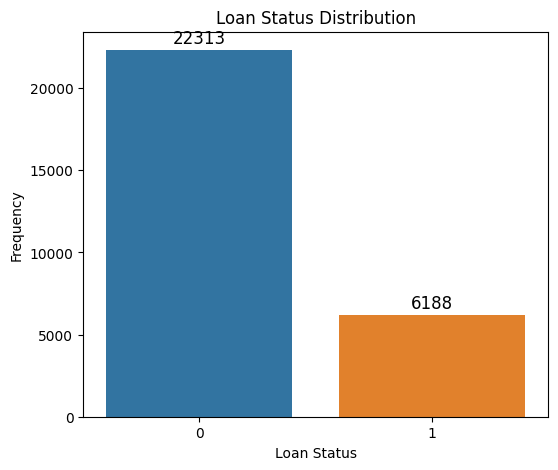

In [19]:
# Loan status distribution
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='loan_status', data=df)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')

# Add Bar counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

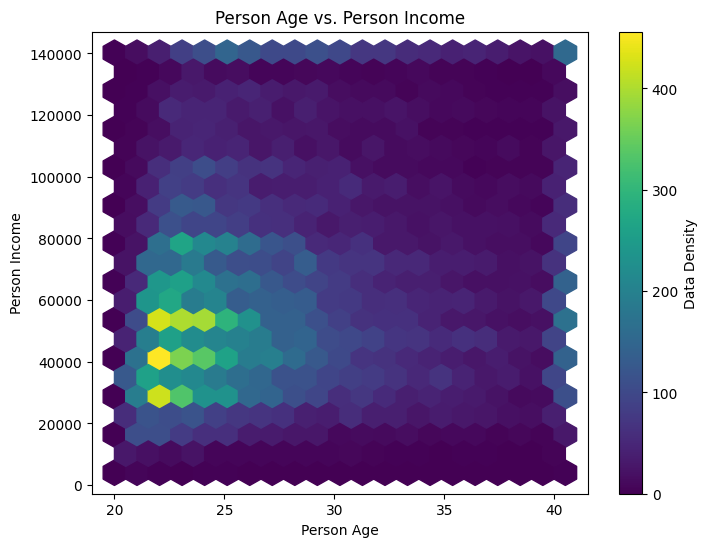

In [20]:
# Person Age vs Person Income
plt.figure(figsize=(8, 6))
plt.hexbin(df['person_age'], df['person_income'], gridsize=20, cmap='viridis')
plt.title('Person Age vs. Person Income')
plt.xlabel('Person Age')
plt.ylabel('Person Income')
cb = plt.colorbar()
cb.set_label('Data Density')
plt.show()

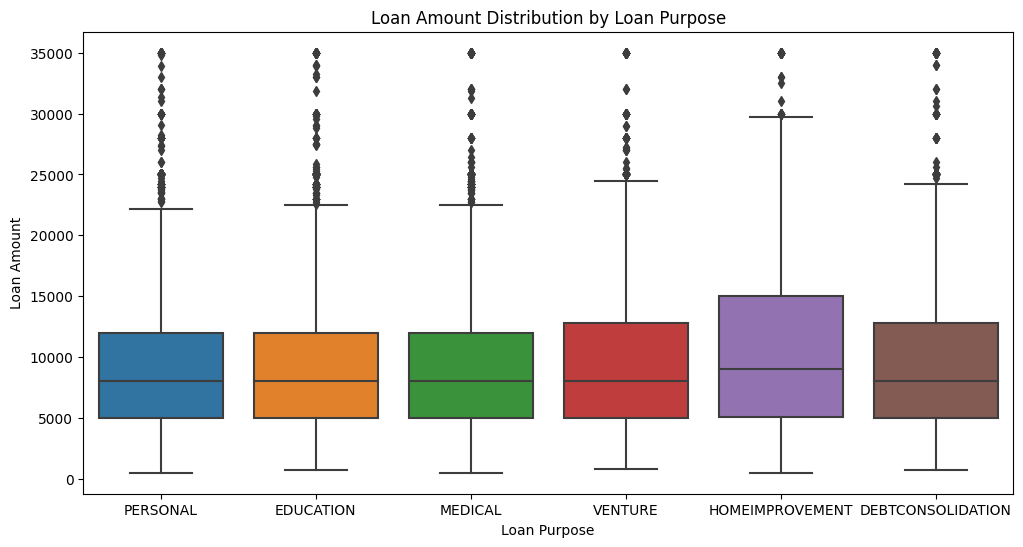

In [21]:
# Loan amount by loan intention
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_intent', y='loan_amnt', data=df)
plt.title('Loan Amount Distribution by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Loan Amount')
plt.show()

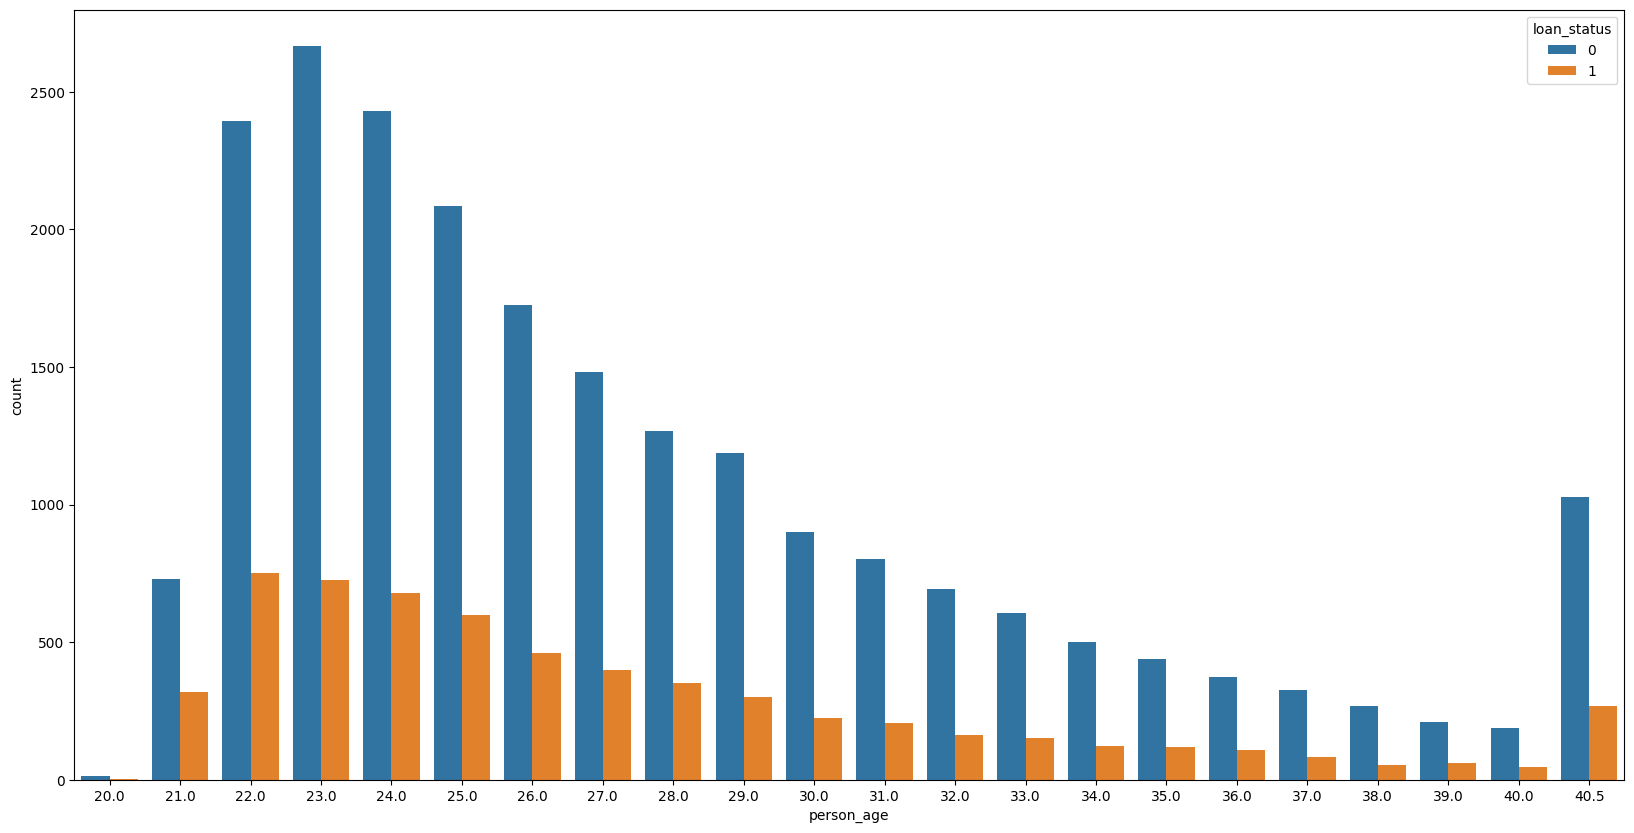

In [22]:
# Loan Status vs Age
plt.figure(figsize=[20,10])
sns.countplot(x = 'person_age', hue= 'loan_status', data=df);

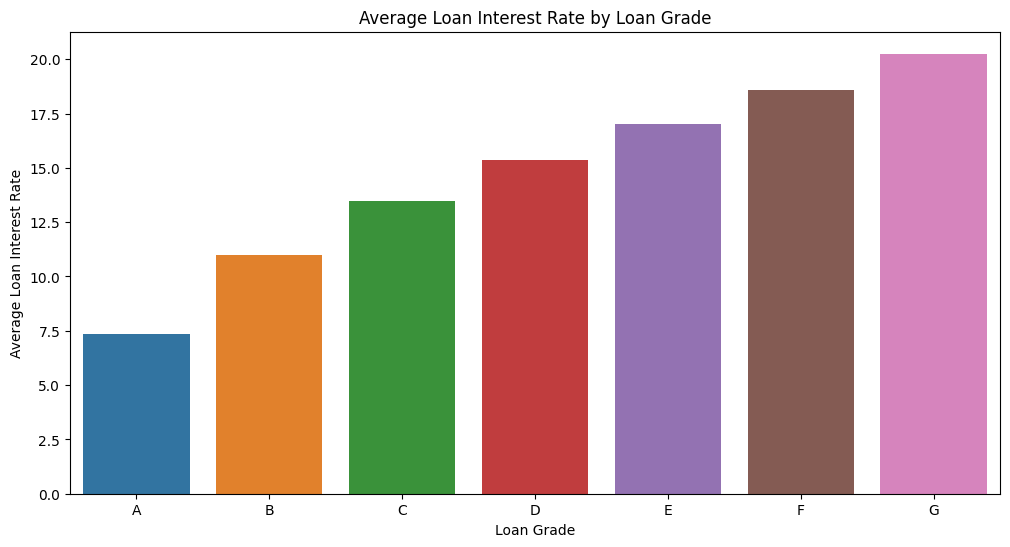

In [23]:
# Average loan_int_rate by loan_grade
plt.figure(figsize=(12, 6))
sns.barplot(x='loan_grade', y='loan_int_rate', data=df, order=sorted(df['loan_grade'].unique()), ci=None)
plt.title('Average Loan Interest Rate by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Average Loan Interest Rate')
plt.show()

,person_age,person_income,person_emp_length,cb_person_cred_hist_length
person_age,1.00,0.13,0.16,0.87
person_income,0.13,1.00,0.21,0.10
person_emp_length,0.16,0.21,1.00,0.13
cb_person_cred_hist_length,0.87,0.10,0.13,1.00


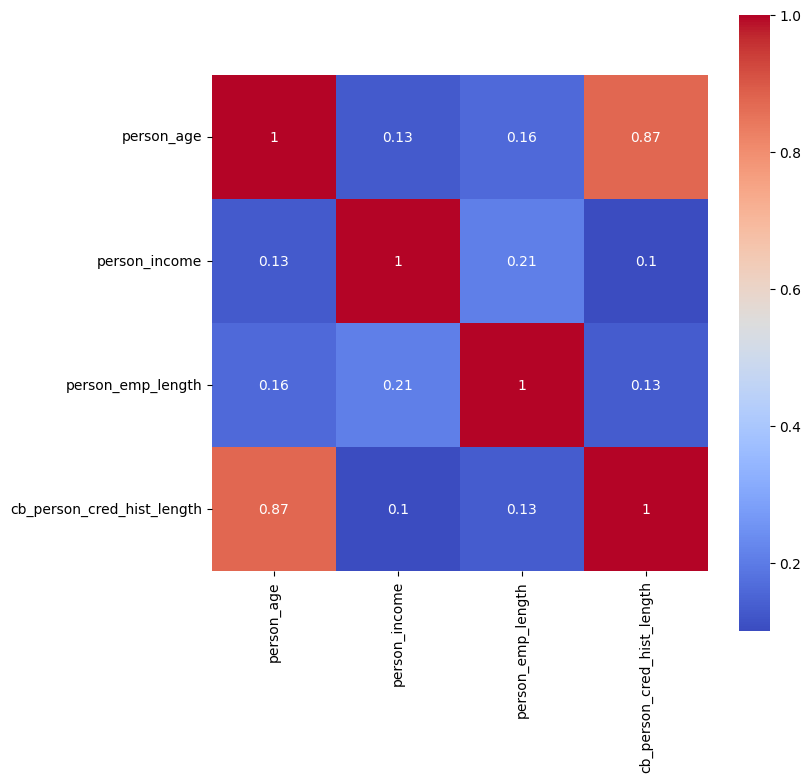

In [24]:
# Create a correlation matrix
correlations = df[["person_age", "person_income", "person_emp_length", "cb_person_cred_hist_length"]].corr()
# Create a heatmap to visualize the correlation matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", square=True)
# Display the correlation matrix with rounded values
correlations.round(2)

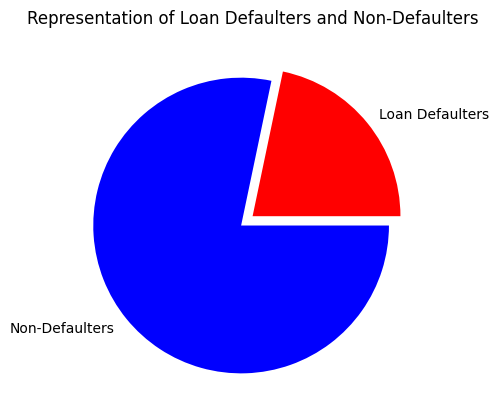

In [25]:
# Loan Defaulters Pie Chart
loan_defaulters = df[df.loan_status == 1].loan_status.count()
non_defaulters = df[df.loan_status == 0].loan_status.count()
values = [loan_defaulters, non_defaulters]
colors = ['r', 'b']
explode = [0, 0.1]
labels = ['Loan Defaulters', 'Non-Defaulters']
plt.pie(values, colors=colors, labels=labels, explode=explode)
plt.title('Representation of Loan Defaulters and Non-Defaulters')
plt.show()

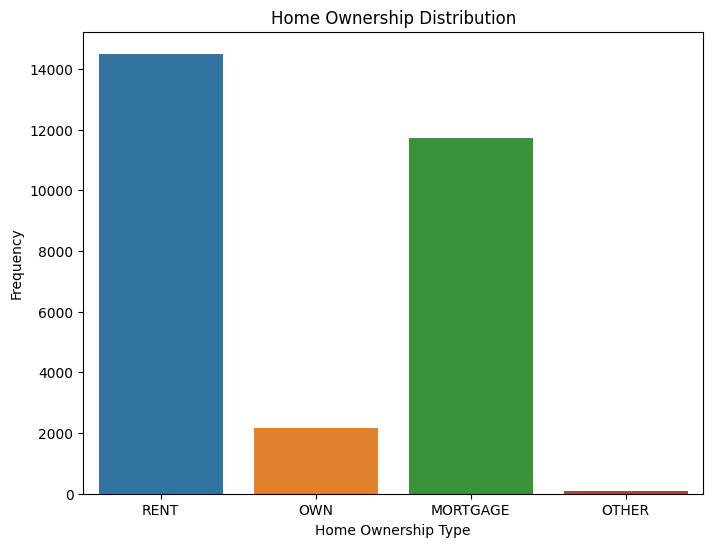

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='person_home_ownership', data=df)
plt.title('Home Ownership Distribution')
plt.xlabel('Home Ownership Type')
plt.ylabel('Frequency')
plt.show()